<a href="https://colab.research.google.com/github/GuillermoFidalgo/Python-for-STEM-Teachers-Workshop/blob/master/notebooks/7-Introduction_to_Pandas_with_COVID_19_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction




Since the beginning of the pandemic caused by the new coronavirus and that causes the COVID-19 disease, the community in general and especially the scientific community has followed the spread rate throughout the world. The most outstanding data that have been studied are the number of infections and deaths as a function of time, providing information about their evolution and control.
In this code we will use the data stored in covidtracking.com where we will focus on the study of the monitoring parameters of the pandemic in Puerto Rico, manipulating and analyzing the data through tables and histograms through the use of Python and its powerful tools.

Later we will try to answer questions such as what is the number of cases and deaths up to a certain date, how is its increase over time and if we are stopping or continuing the spread of the virus.

# Importing Libraries 



This only needs to be run once!!

Pandas is a Python library used for data manipulation and analysis of numerical tables and time series. Since we will be working with tabulated data we can take advantage of Pandas' extensive modularity and variety of methods to work with tables.



In [1]:
import pandas as pd  # This imports the Pandas Library and gives it a reference name to access pandas and it's methods

## Loading in Data

There are 3 main ways to upload and access data in Google Colab:


1.   From Google Drive (mounting the drive)
2.   Directly from your computer
3.   Store that data somewhere in the internet and specify it's url (**our method**)



We are loading a csv file with pandemic information caused by new coronavirus


Note that we specify 

### Method 1: Google Drive

In [ ]:
# Data in a Google Drive
from google.colab import drive
drive.mount('/content/drive')
data_in_drive="/content/drive/MyDrive/UPRM/STEM Workshop/Feb 2021/Data/puerto-rico-history.csv"


df=pd.read_csv(data_in_drive,
               index_col=0,
               na_values="-") 
df

### Method 2: Upload from computer

In [ ]:
# Or just upload the data from your computer to the Session
data = "puerto-rico-history.csv"

df=pd.read_csv(data) #,index_col=0) # Here we have specified that the first colum is the index column.
df

### Method 3: Load from Internet

Define where the data is located as a string and store it in a variable. 
for example: 
`data='data_location' (using single or double quotes)`


**Important** 

Always look at your data beforehand. Be familiar with the structure and what it contains.

Also, in case you want to do this with your students, the easiest way is to have the data stored somewhere on the internet and have a link that your students can access. In our case this would be stored in a file of Github Repository and we will access it from there as follows

In [2]:
# Our method (From Internet)
data_url="https://raw.githubusercontent.com/GuillermoFidalgo/Python-for-STEM-Teachers-Workshop/master/data/puerto-rico-history.csv"


#here we load the csv file 
df=pd.read_csv(data_url,parse_dates=True)

# For more information about each argument you could hover your cursor over the function until a window appears
# you could also put your cursor INSIDE the function and press Ctrl+Shift+Space


In [3]:
df.shape #number of rows and columns

(315, 42)

## Let's look at the first 5 entries of the data

In [4]:
df.head(5)

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,negativeTestsAntibody,negativeTestsPeopleAntibody,negativeTestsViral,onVentilatorCumulative,onVentilatorCurrently,positive,positiveCasesViral,positiveIncrease,positiveScore,positiveTestsAntibody,positiveTestsAntigen,positiveTestsPeopleAntibody,positiveTestsPeopleAntigen,positiveTestsViral,recovered,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-01-24,PR,B,1773.0,1485.0,2,288.0,NaN,NaN,310.0,0,NaN,50.0,305972.0,0,NaN,NaN,303412.0,NaN,43.0,91028,84578.0,955,0,65807.0,NaN,NaN,NaN,7002.0,73760.0,NaN,0,397000,955,NaN,NaN,NaN,NaN,NaN,0,310546.0,0
1,2021-01-23,PR,B,1771.0,1483.0,10,288.0,NaN,NaN,325.0,0,NaN,54.0,305972.0,0,NaN,NaN,303412.0,NaN,46.0,90073,83670.0,791,0,64390.0,NaN,NaN,NaN,7002.0,73760.0,NaN,0,396045,791,NaN,NaN,NaN,NaN,NaN,0,310546.0,0
2,2021-01-22,PR,B,1761.0,1471.0,29,290.0,NaN,NaN,341.0,0,NaN,56.0,305972.0,0,NaN,NaN,303412.0,NaN,53.0,89282,82990.0,554,0,63594.0,NaN,NaN,NaN,7002.0,73760.0,NaN,0,395254,554,NaN,NaN,NaN,NaN,NaN,0,310546.0,0
3,2021-01-21,PR,B,1732.0,1447.0,15,285.0,NaN,NaN,344.0,0,NaN,60.0,305972.0,0,NaN,NaN,303412.0,NaN,52.0,88728,82540.0,215,0,63333.0,NaN,NaN,NaN,7002.0,73760.0,NaN,0,394700,215,NaN,NaN,NaN,NaN,NaN,0,310546.0,0
4,2021-01-20,PR,B,1717.0,1432.0,14,285.0,NaN,NaN,331.0,0,NaN,48.0,305972.0,0,NaN,NaN,303412.0,NaN,52.0,88513,82378.0,140,0,63188.0,NaN,NaN,NaN,7002.0,73760.0,NaN,0,394485,140,NaN,NaN,NaN,NaN,NaN,0,310546.0,0


Now that we have the appropiate format we can choose the columns we want to look at and we can also filter the incomplete entries by using the `dropna()` method 

In [5]:
df=df.dropna(axis=1,how='all')
df


,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalizedCurrently,hospitalizedIncrease,inIcuCurrently,negative,negativeIncrease,negativeTestsViral,onVentilatorCurrently,positive,positiveCasesViral,positiveIncrease,positiveScore,positiveTestsAntibody,positiveTestsViral,recovered,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-01-24,PR,B,1773.0,1485.0,2,288.0,310.0,0,50.0,305972.0,0,303412.0,43.0,91028,84578.0,955,0,65807.0,7002.0,73760.0,0,397000,955,0,310546.0,0
1,2021-01-23,PR,B,1771.0,1483.0,10,288.0,325.0,0,54.0,305972.0,0,303412.0,46.0,90073,83670.0,791,0,64390.0,7002.0,73760.0,0,396045,791,0,310546.0,0
2,2021-01-22,PR,B,1761.0,1471.0,29,290.0,341.0,0,56.0,305972.0,0,303412.0,53.0,89282,82990.0,554,0,63594.0,7002.0,73760.0,0,395254,554,0,310546.0,0
3,2021-01-21,PR,B,1732.0,1447.0,15,285.0,344.0,0,60.0,305972.0,0,303412.0,52.0,88728,82540.0,215,0,63333.0,7002.0,73760.0,0,394700,215,0,310546.0,0
4,2021-01-20,PR,B,1717.0,1432.0,14,285.0,331.0,0,48.0,305972.0,0,303412.0,52.0,88513,82378.0,140,0,63188.0,7002.0,73760.0,0,394485,140,0,310546.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,2020-03-20,PR,NaN,NaN,NaN,0,NaN,NaN,0,NaN,114.0,58,NaN,NaN,14,NaN,9,0,NaN,NaN,NaN,0,128,67,0,NaN,0
311,2020-03-19,PR,NaN,NaN,NaN,0,NaN,NaN,0,NaN,56.0,25,NaN,NaN,5,NaN,0,0,NaN,NaN,NaN,0,61,25,0,NaN,0
312,2020-03-18,PR,NaN,NaN,NaN,0,NaN,NaN,0,NaN,31.0,18,NaN,NaN,5,NaN,0,0,NaN,NaN,NaN,0,36,18,0,NaN,0
313,2020-03-17,PR,NaN,NaN,NaN,0,NaN,NaN,0,NaN,13.0,4,NaN,NaN,5,NaN,0,0,NaN,NaN,NaN,0,18,4,0,NaN,0


As one can see the Covid-19 Data is somethig that progresses with time, so we would like to have the data be indexed by the `date` column. We do this as follows with the `set_index()` method.

In [6]:
df=df.set_index("date")
df

,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalizedCurrently,hospitalizedIncrease,inIcuCurrently,negative,negativeIncrease,negativeTestsViral,onVentilatorCurrently,positive,positiveCasesViral,positiveIncrease,positiveScore,positiveTestsAntibody,positiveTestsViral,recovered,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-24,PR,B,1773.0,1485.0,2,288.0,310.0,0,50.0,305972.0,0,303412.0,43.0,91028,84578.0,955,0,65807.0,7002.0,73760.0,0,397000,955,0,310546.0,0
2021-01-23,PR,B,1771.0,1483.0,10,288.0,325.0,0,54.0,305972.0,0,303412.0,46.0,90073,83670.0,791,0,64390.0,7002.0,73760.0,0,396045,791,0,310546.0,0
2021-01-22,PR,B,1761.0,1471.0,29,290.0,341.0,0,56.0,305972.0,0,303412.0,53.0,89282,82990.0,554,0,63594.0,7002.0,73760.0,0,395254,554,0,310546.0,0
2021-01-21,PR,B,1732.0,1447.0,15,285.0,344.0,0,60.0,305972.0,0,303412.0,52.0,88728,82540.0,215,0,63333.0,7002.0,73760.0,0,394700,215,0,310546.0,0
2021-01-20,PR,B,1717.0,1432.0,14,285.0,331.0,0,48.0,305972.0,0,303412.0,52.0,88513,82378.0,140,0,63188.0,7002.0,73760.0,0,394485,140,0,310546.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-20,PR,NaN,NaN,NaN,0,NaN,NaN,0,NaN,114.0,58,NaN,NaN,14,NaN,9,0,NaN,NaN,NaN,0,128,67,0,NaN,0
2020-03-19,PR,NaN,NaN,NaN,0,NaN,NaN,0,NaN,56.0,25,NaN,NaN,5,NaN,0,0,NaN,NaN,NaN,0,61,25,0,NaN,0
2020-03-18,PR,NaN,NaN,NaN,0,NaN,NaN,0,NaN,31.0,18,NaN,NaN,5,NaN,0,0,NaN,NaN,NaN,0,36,18,0,NaN,0


We can filter out some columns. Let's see what we are interested in..

In [7]:
# This gives us the names of the colums available
df.columns

Index(['state', 'dataQualityGrade', 'death', 'deathConfirmed', 'deathIncrease',
       'deathProbable', 'hospitalizedCurrently', 'hospitalizedIncrease',
       'inIcuCurrently', 'negative', 'negativeIncrease', 'negativeTestsViral',
       'onVentilatorCurrently', 'positive', 'positiveCasesViral',
       'positiveIncrease', 'positiveScore', 'positiveTestsAntibody',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViralIncrease',
       'totalTestResults', 'totalTestResultsIncrease',
       'totalTestsPeopleViralIncrease', 'totalTestsViral',
       'totalTestsViralIncrease'],
      dtype='object')

This is the way to select specific columns of interest

In [8]:
relevant=df[['death','deathIncrease','positive', 'positiveIncrease','totalTestResults',
       'totalTestResultsIncrease']]

 We want so know some info about the data

In [9]:
relevant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 315 entries, 2021-01-24 to 2020-03-16
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   death                     309 non-null    float64
 1   deathIncrease             315 non-null    int64  
 2   positive                  315 non-null    int64  
 3   positiveIncrease          315 non-null    int64  
 4   totalTestResults          315 non-null    int64  
 5   totalTestResultsIncrease  315 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 17.2+ KB


In [10]:
relevant.describe()

,death,deathIncrease,positive,positiveIncrease,totalTestResults,totalTestResultsIncrease
count,309.000000,315.000000,315.000000,315.000000,315.00000,315.000000
mean,563.721683,5.628571,23258.349206,288.961905,232625.91746,1260.273016
std,513.503316,5.752746,26972.545010,355.550410,147014.66015,7125.346799
min,1.000000,0.000000,5.000000,-640.000000,14.00000,-9312.000000
25%,142.000000,1.000000,1317.500000,23.500000,61731.00000,44.000000
50%,390.000000,4.000000,12576.000000,180.000000,318548.00000,245.000000
75%,872.000000,9.000000,37235.500000,444.500000,343207.50000,504.000000
max,1773.000000,29.000000,91028.000000,2169.000000,397000.00000,79420.000000


Pandas can automatically convert the data in each column inteligently by looking at the entries in each column.


In [11]:
relevant=relevant.convert_dtypes() #This converts the data

# Now we can verify and see the information that our dataframe contains
print(relevant.info())


<class 'pandas.core.frame.DataFrame'>
Index: 315 entries, 2021-01-24 to 2020-03-16
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   death                     309 non-null    Int64
 1   deathIncrease             315 non-null    Int64
 2   positive                  315 non-null    Int64
 3   positiveIncrease          315 non-null    Int64
 4   totalTestResults          315 non-null    Int64
 5   totalTestResultsIncrease  315 non-null    Int64
dtypes: Int64(6)
memory usage: 19.1+ KB
None


# Exercises


We want to know a few things:
- How many deaths and positives we have at one specific date
- How are the cases increasing with time?
- Are we flattening the curve?

## How many deaths and positive cases we have at one specific date


Remember what we have so far.`deaths` is the total amount of probable and confirmed deaths of Covid cases up to a certain date (this means that this is a cumulative value), same principle applies to `positives`

The step below is completely optional. 
We sorted for the index (remember that the index is the date)

In [12]:
relevant.sort_index(inplace=True)
relevant

,death,deathIncrease,positive,positiveIncrease,totalTestResults,totalTestResultsIncrease
date,,,,,,
2020-03-16,<NA>,0,5,0,14,0
2020-03-17,<NA>,0,5,0,18,4
2020-03-18,<NA>,0,5,0,36,18
2020-03-19,<NA>,0,5,0,61,25
2020-03-20,<NA>,0,14,9,128,67
...,...,...,...,...,...,...
2021-01-20,1717,14,88513,140,394485,140
2021-01-21,1732,15,88728,215,394700,215
2021-01-22,1761,29,89282,554,395254,554


We want to see the amound of people that *have ever been diagnosed positive* until one day.For this we could just specify the date and look at the entry

In [13]:
positives=relevant['positive']

In [14]:
date='2021-01-24' 
print("Amount of positives at",date,"is:", positives.loc[date]) 

Amount of positives at 2021-01-24 is: 91028


This is great!
But we can use a plot to show this information in a graphical way

### Making a plot 
We will use Matplotlib's pyplot library for plots


Here is an example

In [15]:
import matplotlib.pyplot as plt
% matplotlib inline

Let's plot positives vs date

First we have to convert the positive variable to a numpy array as follows

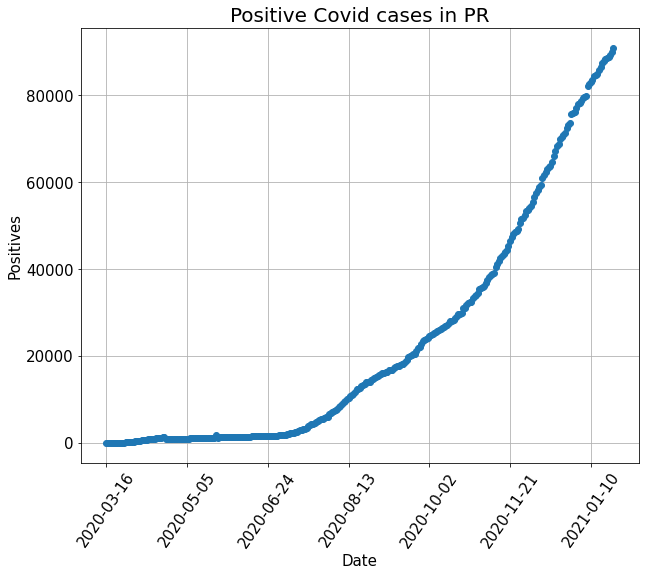

In [16]:
positives.plot(figsize=(10,8),
               grid=True,
               fontsize=15,
               rot=55,
               style='o'
               )
plt.ylabel('Positives',fontsize=15)
plt.title("Positive Covid cases in PR",fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.show()

## How are the cases increasing with time?

For this we can plot the positive/death increase column

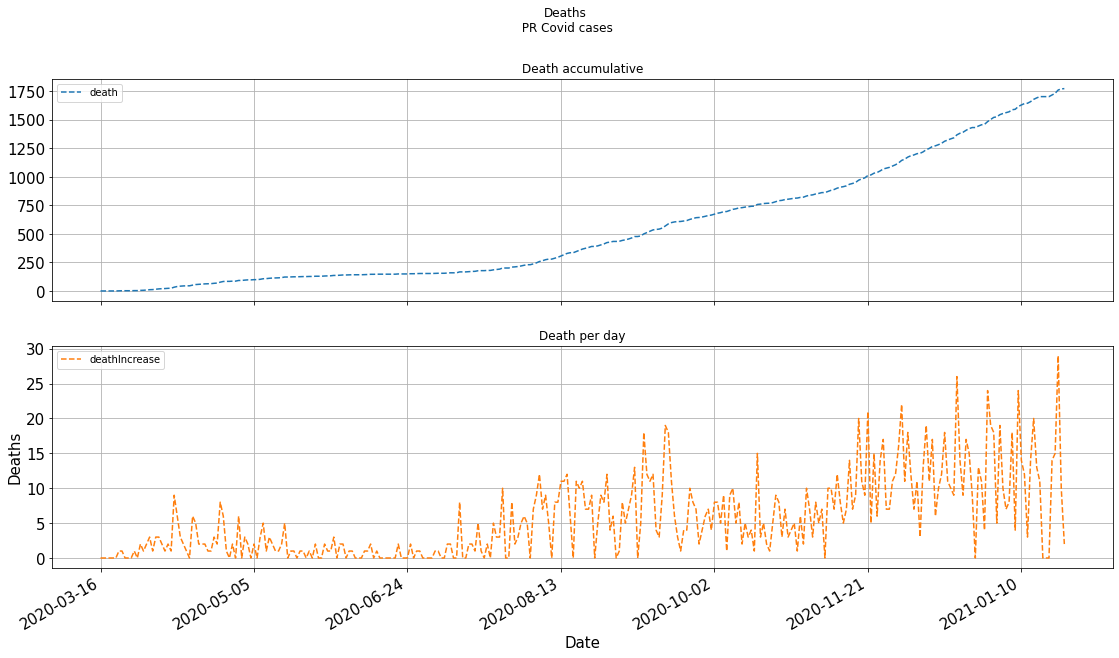

In [19]:
relevant.fillna(0,inplace=True)
ax=relevant[['death','deathIncrease']].plot(subplots=True,
               style='--',
               figsize=(19,10),
               grid=True,
               sharex=True,
               title="Deaths\n PR Covid cases",
               fontsize=15)
ax[0].set_title('Death accumulative')
ax[1].set_title("Death per day")
plt.ylabel('Deaths',fontsize=15)
plt.legend()
plt.xlabel('Date',fontsize=15)
plt.show()

If you get an erro about `TypeError: float() argument must be a string or a number, not 'NAType'`
then you should fill the Null values in the dataframe.
Let's go back and do this.

# Are we flattening the curve?

To show this we follow the tips shown in the video below


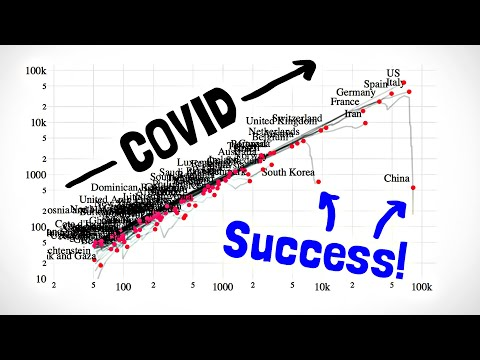

In [18]:
from IPython.display import YouTubeVideo
YouTubeVideo('54XLXg4fYsc',start=54,width=1000,height=600)

So we have to plot `positiveIncrease` vs `positive` and both on a log scale. 

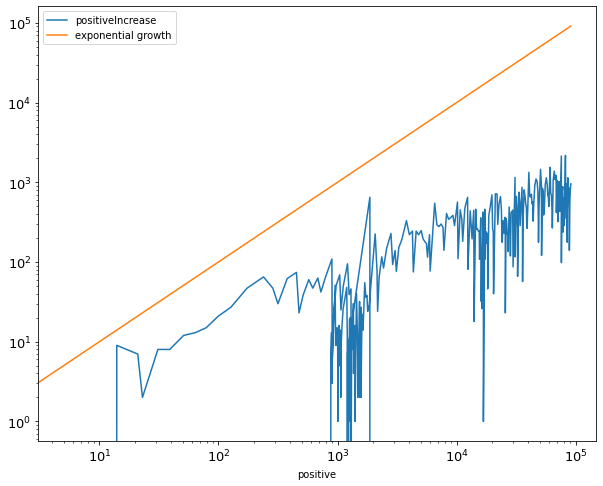

In [20]:
relevant[['positive','positiveIncrease']].plot(x='positive',y='positiveIncrease',
                                               figsize=(10,8),fontsize=13)
plt.plot([0,max(positives)],[0,max(positives)],label='exponential growth') # this is the line that represents exponential growth on a log scale plot like ours
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

This is to noisy. Let's take the same plot but with the 7-day average. 
First we add a new column to the dataframe

In [21]:
relevant['7-day average']=relevant['positiveIncrease'].rolling(window=7).mean()
relevant.fillna(0,inplace=False)
relevant

#if you get an error about Null values change inplace to True

,death,deathIncrease,positive,positiveIncrease,totalTestResults,totalTestResultsIncrease,7-day average
date,,,,,,,
2020-03-16,0,0,5,0,14,0,NaN
2020-03-17,0,0,5,0,18,4,NaN
2020-03-18,0,0,5,0,36,18,NaN
2020-03-19,0,0,5,0,61,25,NaN
2020-03-20,0,0,14,9,128,67,NaN
...,...,...,...,...,...,...,...
2021-01-20,1717,14,88513,140,394485,140,553.428571
2021-01-21,1732,15,88728,215,394700,215,558.857143
2021-01-22,1761,29,89282,554,395254,554,475.428571


Now we plot 

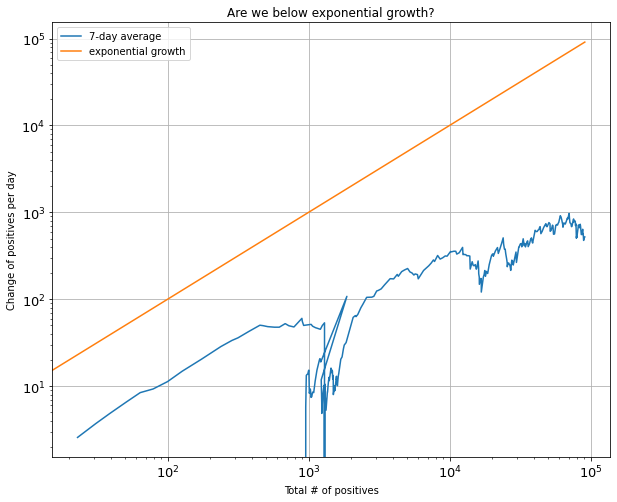

In [22]:
relevant.plot(kind='line',x='positive',y='7-day average',
              figsize=(10,8),fontsize=13,
              grid=True,
              title="Are we below exponential growth?"
              )
plt.plot([0,max(positives)],[0,max(positives)],label='exponential growth') # this is the line that represents exponential growth on a log scale plot like ours
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total # of positives')
plt.ylabel('Change of positives per day')
plt.legend()
plt.show()

# Resources

To see information from the source of the data visit [Covid Tracking Project](https://covidtracking.com/)

More info and documentation: 


*   [Pandas ](https://pandas.pydata.org/)
*   [Matplotlib ](https://matplotlib.org/)
*   [Numpy](https://numpy.org/)

